In [5]:
#Intro: Titanic Challenge
#Using Python, pandas and numpy basics to extract information from the dataset 
#Questions: 

In [6]:
#For handling data
import pandas as pd
from pandas import Series, DataFrame

#For visualization 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To show plots in the notebook
%matplotlib inline


In [7]:
#Putting the csv file into a Dataframe
titanic_df = pd.read_csv('train.csv')

In [8]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Overview of the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


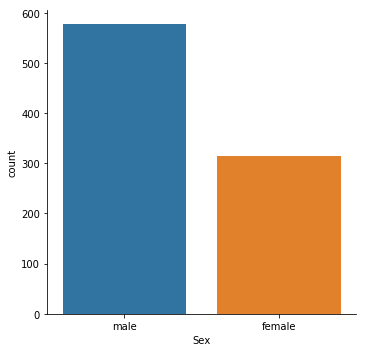

In [17]:
#Getting basic demographic information from the dataset
#Gender distribution

sns.catplot('Sex', data = titanic_df, kind = 'count')

#Overall more males than females

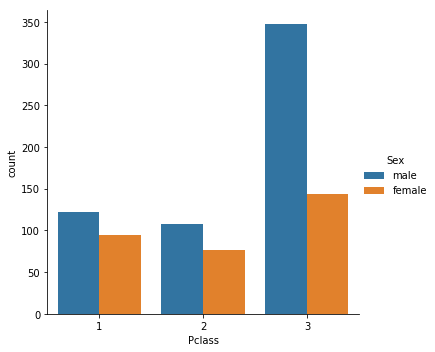

In [30]:
#Gender distribution by class
sns.catplot('Pclass', hue= 'Sex', data = titanic_df, kind = 'count')

#Males are considerably higher in the 3rd class

In [22]:
#Age distribution: Male, Female or Child 
#Important because Titanic had a children and women first policy
#Using apply technique to create a column for this distribution

def sex_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

titanic_df['person'] = titanic_df[['Age','Sex']].apply(sex_child, axis = 1)

#Checking if this works
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


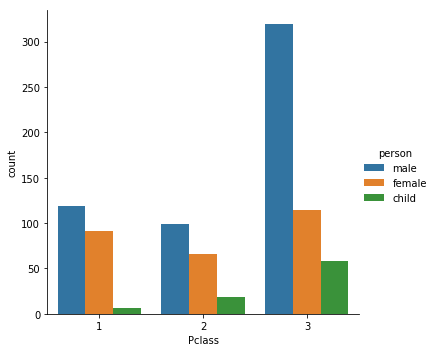

In [32]:
#Factorplot with new column
#Doubt: Difference between factorplot and histogram?

sns.catplot('Pclass', hue = 'person', data = titanic_df, kind = 'count')


In [42]:
#More males and children in 3rd class than any other class
#Getting count

#Doubt: Getting number of chi

titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

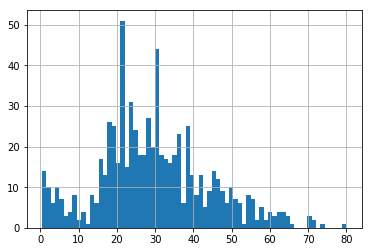

In [43]:
#Overall age distribution using histograms

titanic_df['Age'].hist(bins = 70)

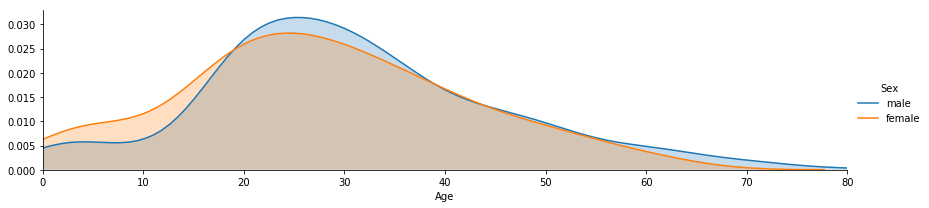

In [54]:
#Using FacetGrid to plot multiple kdeplots

fig = sns.FacetGrid(titanic_df, hue = 'Sex',aspect = 4)

#Mapping all kdeplots for Age, by hue = Sex
fig.map(sns.kdeplot, 'Age', shade = 'True')

#Setting max and min as zero, and oldest passenger
#Kdeplot extends over 80 if limit is not set 

oldest = titanic_df['Age'].max()
fig.set(xlim = (0, oldest))

fig.add_legend()

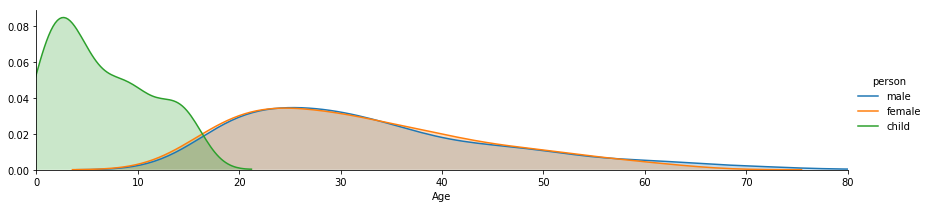

In [56]:
#Repeating the same multiple kdeplot for Person instead of Sex, to include childen

fig = sns.FacetGrid(titanic_df, hue = 'person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = 'True')
oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

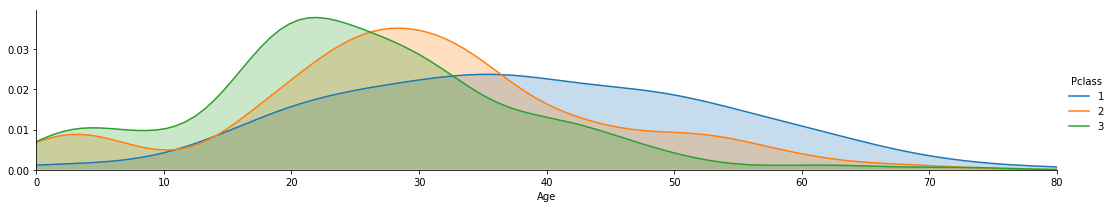

In [57]:
#Kdeplot between Age and Passenger Class

fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 5)
fig.map(sns.kdeplot, 'Age', shade = 'True')
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [58]:
#How does Deck relate to Class

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [62]:
#Cleaning - drop null values in Cabin

deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

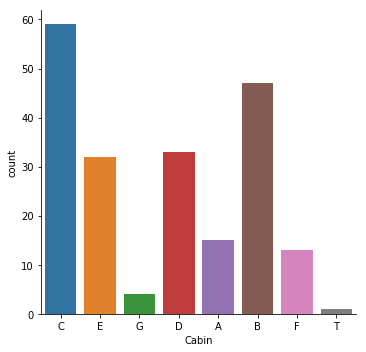

In [65]:
#Cleaning - extract the first letter of Cabin. This gives the deck level

levels = []

for x in deck:
    levels.append(x[0])
    
#Creating new df 
deck_df = DataFrame(levels)
deck_df.columns = ['Cabin']

#Factorplot showing cabin level
sns.catplot('Cabin', data = deck_df, kind = 'count')

#Doubt: How to order the Columns

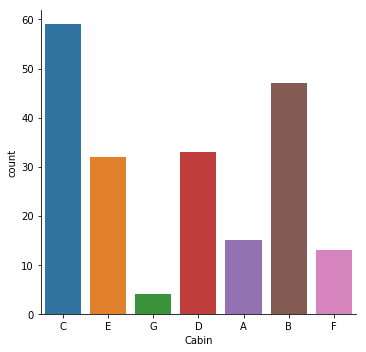

In [71]:
#Cleaning - removing 'T' deck
deck_df = deck_df[deck_df.Cabin != 'T']
deck_df.head()

sns.catplot('Cabin', data = deck_df, kind = 'count')

In [75]:
#Where did the passengers come from?
#Remember C,Q,S in the dataset stand for Cherbourg, Queenstown, Southhampton.

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


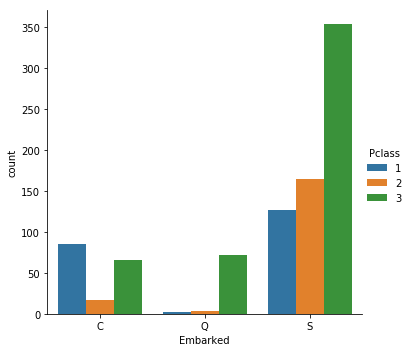

In [84]:
#Embarked column gives us the origins of the passengers
#Making a factorplot

#order sets the x order
#Doubt: How does it help with the nan values
sns.catplot('Embarked', data = titanic_df, hue = 'Pclass', kind = 'count', order=['C','Q','S'])

#Almost all the Queenstown passengers were 3rd class

In [97]:
#Which passengers travelled alone, and which travelled with family?
#Parch - Parent/Child
#SibSp - Sibling/Spouse

#Creating a new column 'Alone'

titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [98]:
#Changing the column values to Alone if zero, and With Family if greater than zero
#Using condition to update column values

titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


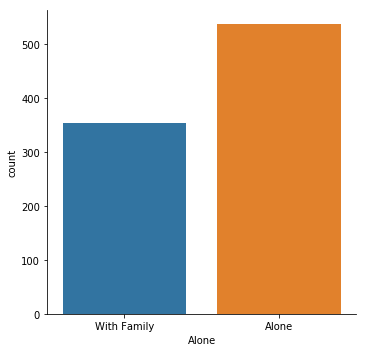

In [103]:
#Factorplot above changes

sns.catplot('Alone', data = titanic_df, kind = 'count')

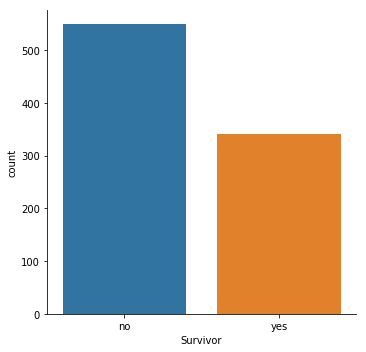

In [114]:
#Done with prelim observations
#Factors which helped in surviving

titanic_df['Survivor'] = titanic_df.Survived.map({0: 'no', 1: 'yes'})

sns.catplot('Survivor', data = titanic_df, kind = 'count')


C:\Users\anous\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


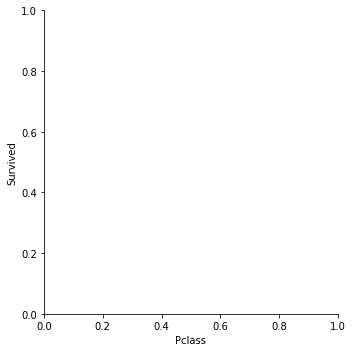

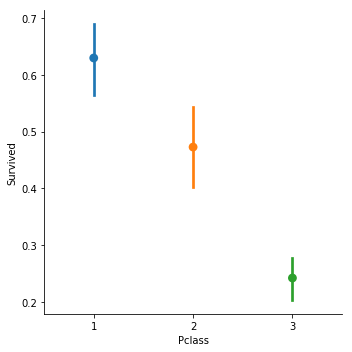

In [131]:
#More people died than survived
#Visualizing the relationship between class and survivors

sns.catplot('Pclass', 'Survived', data = titanic_df, kind = 'factor')

C:\Users\anous\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


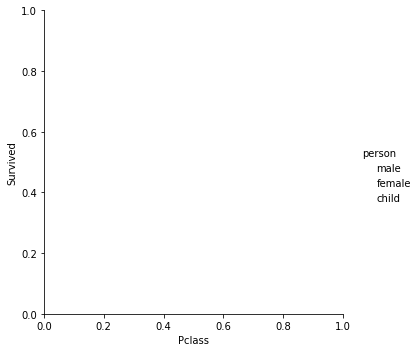

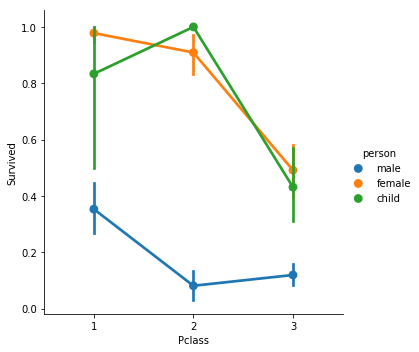

In [126]:
#Checking the relationship between class, survival rate and gender

sns.catplot('Pclass', 'Survived', hue = 'person', data = titanic_df, kind = 'factor')

In [132]:
#Males overall had low chance of surviving, especially in 3rd class. 
#3rd class had low chance of surviving in general
#More children and females in 2nd class, thus highest survival rate

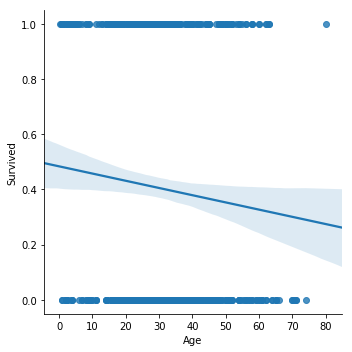

In [133]:
#Relationship between age and survival rate

sns.lmplot('Age', 'Survived', data = titanic_df)

In [134]:
#Older passengers have lesser survival rates

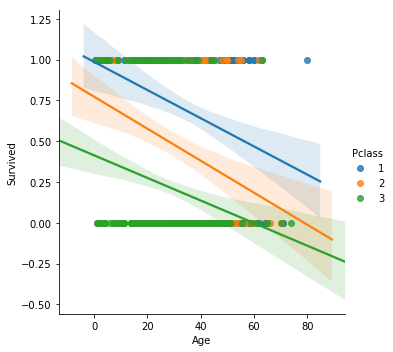

In [135]:
#Checking if Age and Class had a relationship with survival rates

sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df)

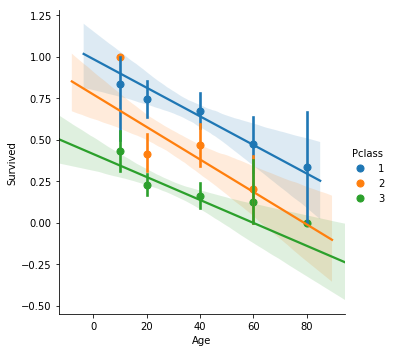

In [137]:
#Cleaning the above figure to add generation demarcations

age_group = [10,20,40,60,80]
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, x_bins = age_group)

In [138]:
#Older 1st class passengers have a good survival rate

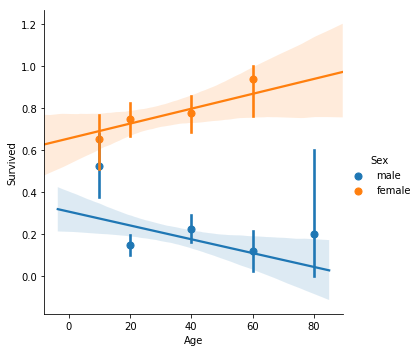

In [139]:
#Relationship between gender and age in survival 

sns.lmplot('Age', 'Survived', hue = 'Sex', data = titanic_df, x_bins = age_group)

AttributeError: 'str' object has no attribute 'conjugate'

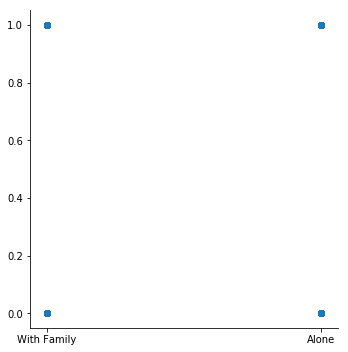

In [144]:
#Relationship between deck and survival rate

sns.lmplot('Alone', 'Survived', data = titanic_df)